In [1]:
#imports
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('../data/1500_review_sentiment.csv')
df.head(2)

,id,latitude,longitude,price,shared_status,accommodates,accomodation_group,bathrooms,bedrooms,beds_adjusted,neighborhood,city,has_neighborhood_overview,has_reviews,host_in_CO,host_lives_in_neighborhood,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,has_host_about,years_hosting,years_of_reviews,license_listed,response_time,host_lives_in_neighborhood.1,name,host_about,description,neighborhood_overview,amenities,minimum_nights,maximum_nights,min_stay_group,max_stay_group,has_availability,availability_30,availability_60,availability_90,availability_365,instant_bookable,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bike_scores,walk_scores,transit_scores,property_page_links,name_sent_compound,name_sent_pos,name_sent_neg,name_sent_neu,host_sent_compound,host_sent_pos,host_sent_neg,host_sent_neu,description_sent_compound,description_sent_pos,description_sent_neg,description_sent_neu,neighborhood_sent_compound,neighborhood_sent_pos,neighborhood_sent_neg,neighborhood_sent_neu,25*k,comments,review_sent_compound,review_sent_pos,review_sent_neg,review_sent_neu
0,177,39.69551,-104.92489,79.0,entire home,2,0-2,1.0,1.0,1.0,Virginia Village,Denver,1,1,1,1,615,Joe,within an hour,1.0,1.00,1.0,Virginia Village,2.0,2.0,1.0,0.0,1,15.0,6.0,1,0.0,1,Tiny Home in the Heart of the City- ECO FRIENDLY,"I'm originally from Oklahoma, but have lived i...","160 sq ft + 80 sq ft loft for sleeping, Sleeps...","Quiet neighborhood next to park, creeks and bi...","[""Hot water"", ""Long term stays allowed"", ""Coff...",29,400,month,long_term,1,29,59,89,364,0,120,24,0,4.85,4.96,4.89,4.97,4.94,4.85,4.78,1.56,84.0,51.0,37.0,https://www.walkscore.com/score/loc/lat=39.695...,0.6037,0.304,0.0,0.696,0.6948,0.192,0.000,0.808,0.9476,0.153,0.069,0.778,0.0000,0.000,0.000,1.000,4.0,"Great place to stay! Definitely a tiny home, b...",0.822648,0.376125,0.007658,0.616217
1,360,39.76758,-105.00316,133.0,entire home,3,3-4,1.0,2.0,2.0,Highland,Denver,1,1,1,1,666,Jennifer & Giovanni,within an hour,1.0,0.87,1.0,Highland,4.0,4.0,1.0,1.0,1,15.0,4.0,1,0.0,1,Sit in the Peaceful Garden of the Chickadee Co...,We are artists and tinkerers.\r\n \r\nWe enjoy...,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,"[""Coffee maker"", ""Washer"", ""Bedroom comforts"",...",29,35,month,2_months,1,0,0,30,30,0,174,7,1,4.99,4.99,4.96,5.00,5.00,5.00,4.91,3.26,93.0,90.0,49.0,https://www.walkscore.com/score/loc/lat=39.767...,0.4939,0.242,0.0,0.758,0.9694,0.141,0.023,0.835,0.9814,0.271,0.019,0.709,0.1531,0.025,0.018,0.956,6.0,"This space was perfect! Great location, hosts,...",0.897685,0.392426,0.005500,0.602074


In [3]:
df.shape

(4077, 85)

In [4]:
df.isna().sum()

id                                 0
latitude                           0
longitude                          0
price                              0
shared_status                      0
accommodates                       0
accomodation_group                 0
bathrooms                          0
bedrooms                           0
beds_adjusted                      0
neighborhood                       0
city                               0
has_neighborhood_overview          0
has_reviews                        0
host_in_CO                         0
host_lives_in_neighborhood         0
host_id                            0
host_name                          0
host_response_time               534
host_response_rate               534
host_acceptance_rate             262
host_is_superhost                  0
host_neighbourhood               259
host_listings_count                0
host_total_listings_count          0
host_has_profile_pic               0
host_identity_verified             0
h

In [5]:
#since I want to incorporate reviews, I need to fix those nulls.  I don't want to make them the mean so I'm left with having to drop them. 
#less than 5% of the df isn't too bad.  

df=df[df['review_scores_accuracy'].notna()]

In [6]:
df.isna().sum()

id                                 0
latitude                           0
longitude                          0
price                              0
shared_status                      0
accommodates                       0
accomodation_group                 0
bathrooms                          0
bedrooms                           0
beds_adjusted                      0
neighborhood                       0
city                               0
has_neighborhood_overview          0
has_reviews                        0
host_in_CO                         0
host_lives_in_neighborhood         0
host_id                            0
host_name                          0
host_response_time               523
host_response_rate               523
host_acceptance_rate             250
host_is_superhost                  0
host_neighbourhood               255
host_listings_count                0
host_total_listings_count          0
host_has_profile_pic               0
host_identity_verified             0
h

# host descriptions

/var/folders/f5/d5gp33rs3pj8ngm1m9by8vn80000gn/T/ipykernel_28882/581222624.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Positive Sentiment','Negative Sentiment', 'Neutral Sentiment', 'Compound Sentiment'], fontsize=12)


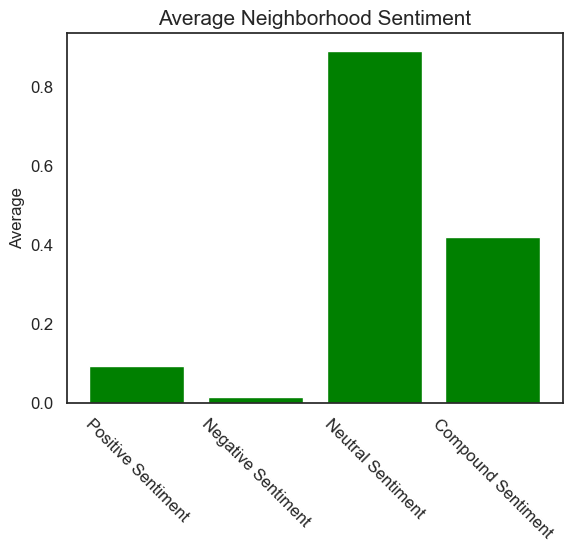

In [61]:
averages = df[['neighborhood_sent_pos','neighborhood_sent_neg', 'neighborhood_sent_neu', 'neighborhood_sent_compound']].mean()

fig, ax = plt.subplots()
ax.bar(averages.index, averages.values, color='green')
ax.set_title('Average Neighborhood Sentiment')
ax.set_ylabel('Average', fontsize=12)
ax.set_xticklabels(['Positive Sentiment','Negative Sentiment', 'Neutral Sentiment', 'Compound Sentiment'], fontsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelrotation=-45)
sns.set_style("white")
plt.show()

In [60]:
averages.mean()

0.354691031705446

/var/folders/f5/d5gp33rs3pj8ngm1m9by8vn80000gn/T/ipykernel_28882/2018407247.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Positive Sentiment','Negative Sentiment', 'Neutral Sentiment', 'Compound Sentiment'])


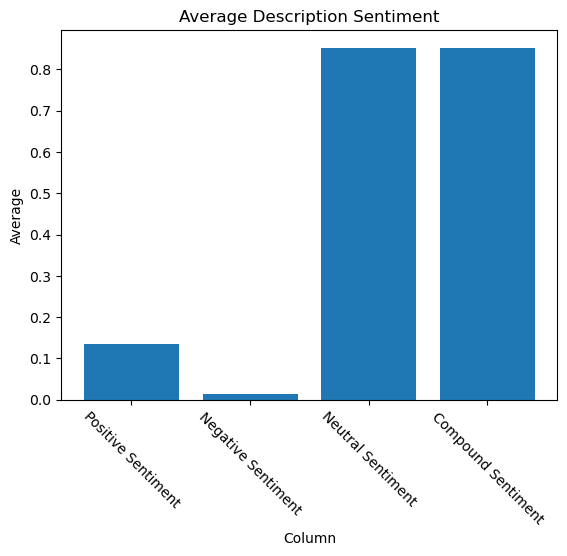

In [10]:
averages = df[['description_sent_pos','description_sent_neg', 'description_sent_neu', 'description_sent_compound']].mean()

fig, ax = plt.subplots()
ax.bar(averages.index, averages.values)
ax.set_title('Average Description Sentiment')
ax.set_ylabel('Average')
ax.set_xticklabels(['Positive Sentiment','Negative Sentiment', 'Neutral Sentiment', 'Compound Sentiment'])
ax.tick_params(axis='x', labelrotation=-45)
plt.show()

/var/folders/f5/d5gp33rs3pj8ngm1m9by8vn80000gn/T/ipykernel_28882/2165611623.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Positive Sentiment','Negative Sentiment', 'Neutral Sentiment', 'Compound Sentiment'], fontsize=12)


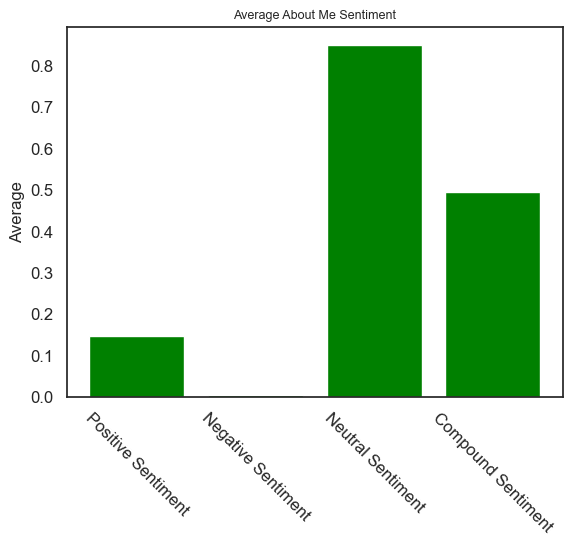

In [71]:
averages = df[['host_sent_pos','host_sent_neg', 'host_sent_neu', 'host_sent_compound']].mean()

# create bar chart
fig, ax = plt.subplots()
ax.bar(averages.index, averages.values, color='green')
ax.set_title('Average About Me Sentiment')
ax.set_ylabel('Average', fontsize=12)
ax.set_xticklabels(['Positive Sentiment','Negative Sentiment', 'Neutral Sentiment', 'Compound Sentiment'], fontsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelrotation=-45)
sns.set_style("white")
plt.show()

# Review sentiment

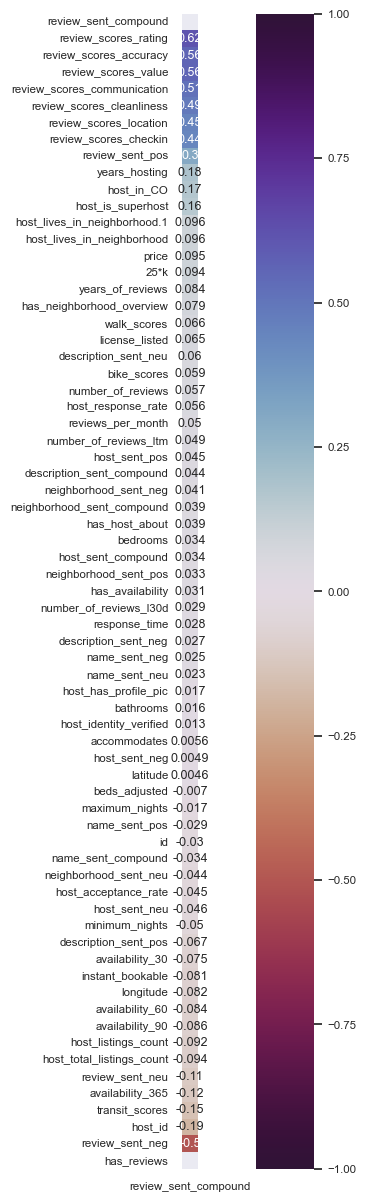

In [68]:
plt.figure(figsize = (15,15))

corr = df.corr()[['review_sent_compound']].sort_values("review_sent_compound", ascending=False)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=.75)
# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, mask = mask, square = True, cmap = 'twilight_shifted_r', annot = True, vmin = -1, vmax = 1);

In [69]:
df[df['number_of_reviews']>1000]

,id,latitude,longitude,price,shared_status,accommodates,accomodation_group,bathrooms,bedrooms,beds_adjusted,neighborhood,city,has_neighborhood_overview,has_reviews,host_in_CO,host_lives_in_neighborhood,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,has_host_about,years_hosting,years_of_reviews,license_listed,response_time,host_lives_in_neighborhood.1,name,host_about,description,neighborhood_overview,amenities,minimum_nights,maximum_nights,min_stay_group,max_stay_group,has_availability,availability_30,availability_60,availability_90,availability_365,instant_bookable,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bike_scores,walk_scores,transit_scores,property_page_links,name_sent_compound,name_sent_pos,name_sent_neg,name_sent_neu,host_sent_compound,host_sent_pos,host_sent_neg,host_sent_neu,description_sent_compound,description_sent_pos,description_sent_neg,description_sent_neu,neighborhood_sent_compound,neighborhood_sent_pos,neighborhood_sent_neg,neighborhood_sent_neu,25*k,comments,review_sent_compound,review_sent_pos,review_sent_neg,review_sent_neu
181,1733052,39.73799,-104.97219,104.0,private room,4,3-4,1.0,1.0,5.0,Cheesman Park,Denver,1,1,1,1,2416216,Jason,within an hour,1.0,1.0,1.0,Cheesman Park,1.0,1.0,1.0,1.0,1,11.0,9.0,1,0.0,1,Beautiful Private Basement Suite near Downtown,I enjoy traveling and exploration; mountain cl...,Beautifully remodeled basement suite in lovely...,Many historical homes with a beautiful park ne...,"[""Hot water"", ""Long term stays allowed"", ""Coff...",1,29,weekend,month,1,12,29,51,302,0,1338,165,5,4.93,4.96,4.97,4.93,4.94,4.9,4.93,11.92,96.0,95.0,56.0,https://www.walkscore.com/score/loc/lat=39.737...,0.5994,0.438,0.0,0.562,0.9702,0.263,0.0,0.737,0.9635,0.156,0.053,0.791,0.8658,0.167,0.03,0.803,5.0,Jason and Vibs were both great hosts. The dow...,0.852102,0.393405,0.007371,0.599228


/var/folders/f5/d5gp33rs3pj8ngm1m9by8vn80000gn/T/ipykernel_28882/1592802043.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Overall', 'Cleanliness', 'Check-in', 'Communication' , 'Location', 'Value'], fontsize=12)


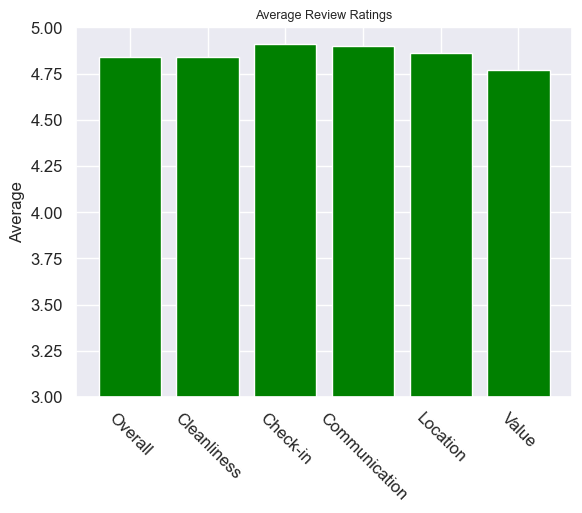

In [70]:
review_scores=df[['review_scores_rating','review_scores_cleanliness','review_scores_checkin',
                  'review_scores_communication', 'review_scores_location','review_scores_value']].mean()

fig, ax = plt.subplots()
ax.bar(review_scores.index, review_scores.values, color='green')
ax.set_title('Average Review Ratings')
ax.set_ylabel('Average', fontsize=12)
ax.set_xticklabels(['Overall', 'Cleanliness', 'Check-in', 'Communication' , 'Location', 'Value'], fontsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelrotation=-45)
ax.set_ylim(3, 5)
sns.set_style("white")
plt.show()

/var/folders/f5/d5gp33rs3pj8ngm1m9by8vn80000gn/T/ipykernel_28882/1782976883.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Positive Sentiment','Negative Sentiment', 'Neutral Sentiment', 'Compound Sentiment'], fontsize=12)


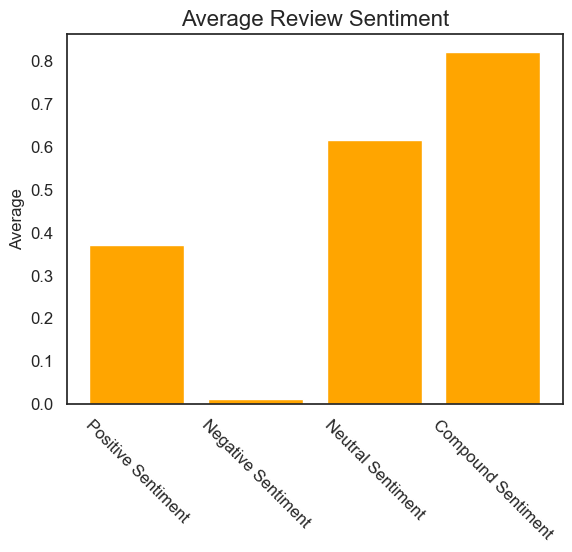

In [76]:
averages = df[['review_sent_pos','review_sent_neg', 'review_sent_neu', 'review_sent_compound']].mean()

fig, ax = plt.subplots()
ax.bar(averages.index, averages.values, color='orange')
ax.set_title('Average Review Sentiment', fontdict={'fontsize': 16})
ax.set_ylabel('Average', fontsize=12)
ax.set_xticklabels(['Positive Sentiment','Negative Sentiment', 'Neutral Sentiment', 'Compound Sentiment'], fontsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelrotation=-45)
sns.set_style("white")
plt.show()

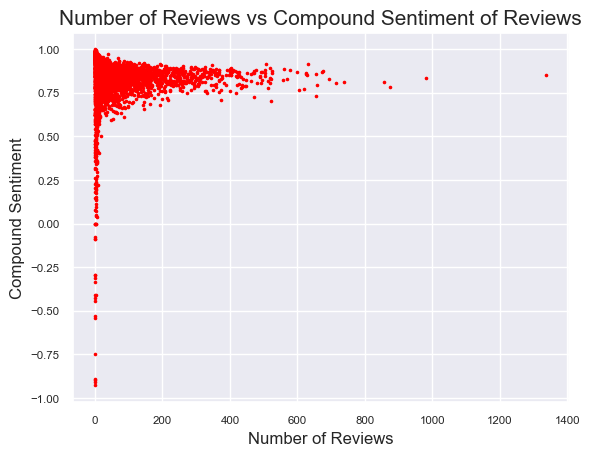

In [14]:
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=12)

plt.scatter(df['number_of_reviews'], df['review_sent_compound'], s=2.5, color='red')
plt.title('Number of Reviews vs Compound Sentiment of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Compound Sentiment')
plt.savefig('../images/number_vs_compound_reviews.png', bbox_inches='tight')
plt.show()

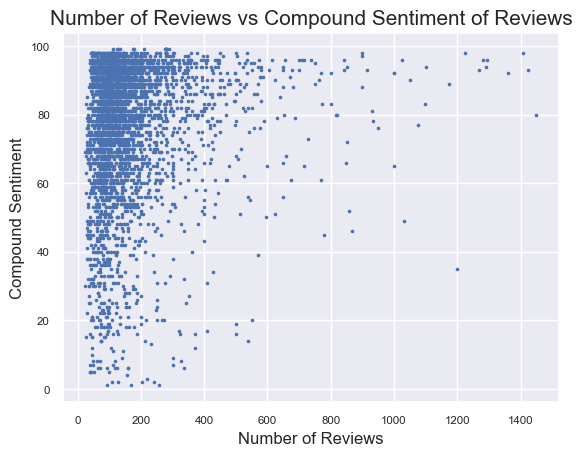

In [15]:
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=12)

plt.scatter(df['price'], df['walk_scores'], s=2.5)
plt.title('Number of Reviews vs Compound Sentiment of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Compound Sentiment')

plt.show()

In [16]:
df.head()

,id,latitude,longitude,price,shared_status,accommodates,accomodation_group,bathrooms,bedrooms,beds_adjusted,neighborhood,city,has_neighborhood_overview,has_reviews,host_in_CO,host_lives_in_neighborhood,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,has_host_about,years_hosting,years_of_reviews,license_listed,response_time,host_lives_in_neighborhood.1,name,host_about,description,neighborhood_overview,amenities,minimum_nights,maximum_nights,min_stay_group,max_stay_group,has_availability,availability_30,availability_60,availability_90,availability_365,instant_bookable,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bike_scores,walk_scores,transit_scores,property_page_links,name_sent_compound,name_sent_pos,name_sent_neg,name_sent_neu,host_sent_compound,host_sent_pos,host_sent_neg,host_sent_neu,description_sent_compound,description_sent_pos,description_sent_neg,description_sent_neu,neighborhood_sent_compound,neighborhood_sent_pos,neighborhood_sent_neg,neighborhood_sent_neu,25*k,comments,review_sent_compound,review_sent_pos,review_sent_neg,review_sent_neu
0,177,39.69551,-104.92489,79.0,entire home,2,0-2,1.0,1.0,1.0,Virginia Village,Denver,1,1,1,1,615,Joe,within an hour,1.0,1.00,1.0,Virginia Village,2.0,2.0,1.0,0.0,1,15.0,6.0,1,0.0,1,Tiny Home in the Heart of the City- ECO FRIENDLY,"I'm originally from Oklahoma, but have lived i...","160 sq ft + 80 sq ft loft for sleeping, Sleeps...","Quiet neighborhood next to park, creeks and bi...","[""Hot water"", ""Long term stays allowed"", ""Coff...",29,400,month,long_term,1,29,59,89,364,0,120,24,0,4.85,4.96,4.89,4.97,4.94,4.85,4.78,1.56,84.0,51.0,37.0,https://www.walkscore.com/score/loc/lat=39.695...,0.6037,0.304,0.0,0.696,0.6948,0.192,0.000,0.808,0.9476,0.153,0.069,0.778,0.0000,0.000,0.000,1.000,4.0,"Great place to stay! Definitely a tiny home, b...",0.822648,0.376125,0.007658,0.616217
1,360,39.76758,-105.00316,133.0,entire home,3,3-4,1.0,2.0,2.0,Highland,Denver,1,1,1,1,666,Jennifer & Giovanni,within an hour,1.0,0.87,1.0,Highland,4.0,4.0,1.0,1.0,1,15.0,4.0,1,0.0,1,Sit in the Peaceful Garden of the Chickadee Co...,We are artists and tinkerers.\r\n \r\nWe enjoy...,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,"[""Coffee maker"", ""Washer"", ""Bedroom comforts"",...",29,35,month,2_months,1,0,0,30,30,0,174,7,1,4.99,4.99,4.96,5.00,5.00,5.00,4.91,3.26,93.0,90.0,49.0,https://www.walkscore.com/score/loc/lat=39.767...,0.4939,0.242,0.0,0.758,0.9694,0.141,0.023,0.835,0.9814,0.271,0.019,0.709,0.1531,0.025,0.018,0.956,6.0,"This space was perfect! Great location, hosts,...",0.897685,0.392426,0.005500,0.602074
2,2361919,39.77960,-105.03859,76.0,entire home,2,0-2,1.0,1.0,1.0,Berkeley,Denver,1,1,1,1,5811115,Annette,within a few hours,1.0,0.81,1.0,Berkeley,5.0,6.0,1.0,0.0,1,10.0,8.0,0,1.0,1,The Cloisters at Berkeley,"I love people of all ages and types, dogs, lon...",A private studio apartment in an unbeatable ne...,"Boutiques, bars, restaurants galore! Highlands...","[""Hot water"", ""Long term stays allowed"", ""Coff...",30,1125,month,long_term,1,24,54,84,359,0,43,3,0,4.67,4.74,4.56,4.67,4.60,4.93,4.60,0.40,76.0,81.0,34.0,https://www.walkscore.com/score/loc/lat=39.779...,0.0000,0.000,0.0,1.000,0.9769,0.278,0.000,0.722,0.9269,0.150,0.000,0.850,0.4333,0.067,0.026,0.907,4.0,Annette was very nice and she had a super cosy...,0.865804,0.293378,0.015956,0.690667
3,2386289,39.76777,-105.03529,150.0,entire home,4,3-4,1.0,1.0,1.0,West Highland,Denver,1,1,1,1,184771,Melanie,NaN,NaN,1.00,0.0,West Highland,1.0,2.0,1.0,1.0,1,13.0,8.0,1,4.0,1,Sunny Sky Loft in Highlands,"Things I love: dogs, urban gardening, yoga, ho...",W